In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


# data visualization

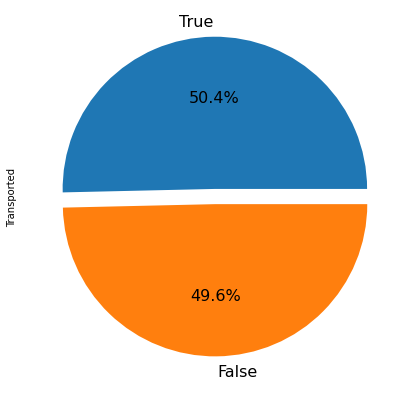

In [7]:
# Transported

plt.figure(figsize=(7,7))
train['Transported'].value_counts().plot.pie(explode = [0.05, 0.05] , 
                                             autopct = '%1.1f%%' , 
                                             textprops = {'fontsize' : 16 })
plt.show();

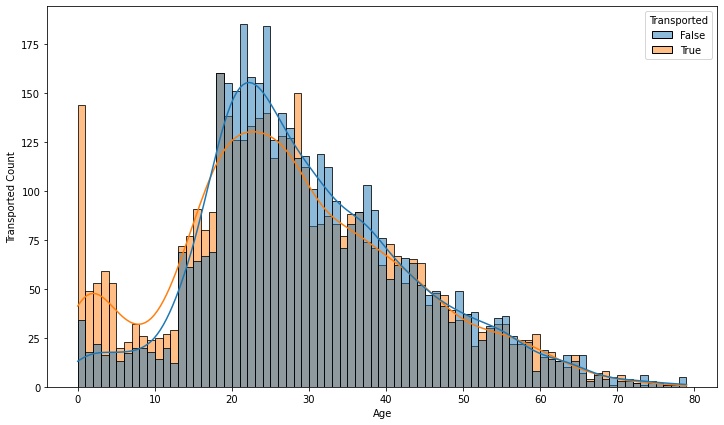

In [8]:
# Age

plt.figure(figsize=(12,7))
sns.histplot(data= train, x= 'Age', hue= 'Transported', binwidth = 1, kde = True)
plt.xlabel('Age')
plt.ylabel('Transported Count')
plt.show();

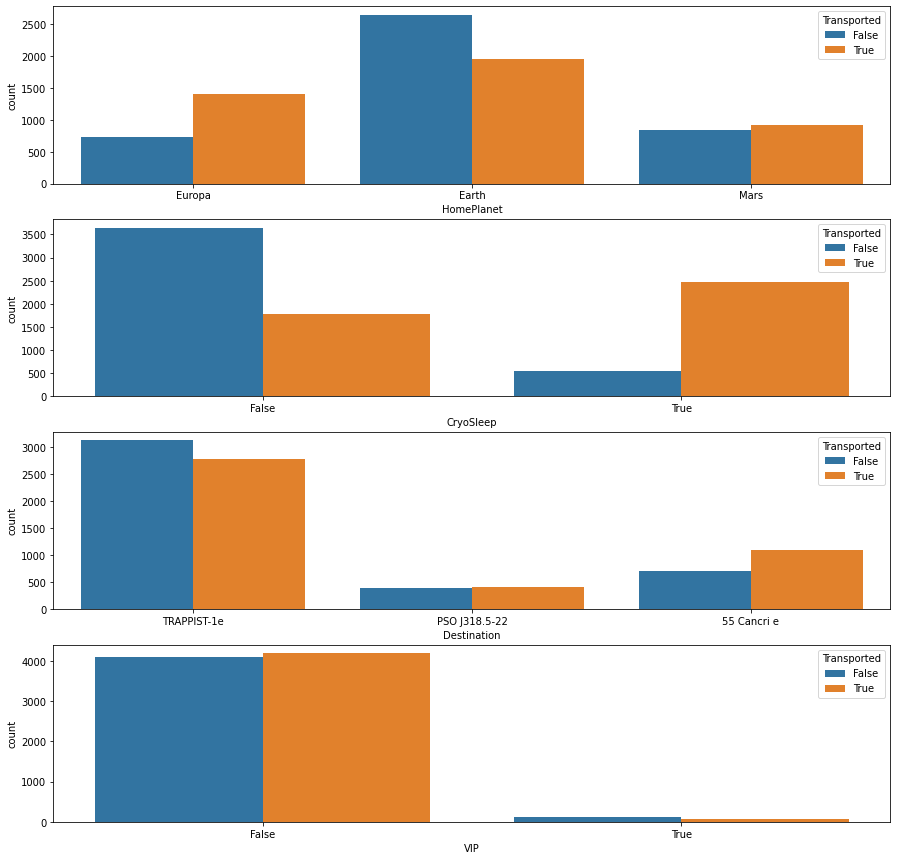

In [9]:
# Categorical

graph_cat = ['HomePlanet' , 'CryoSleep' , 'Destination' , 'VIP']

fig = plt.figure(figsize= (15,15))

for i, name in enumerate(graph_cat):
    
    ax = fig.add_subplot(4, 1, i+1)
    sns.countplot(data= train, axes= ax, x= name, hue= 'Transported')

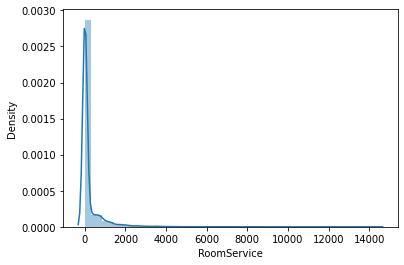

In [10]:
# Numerical 

sns.distplot(train['RoomService']);

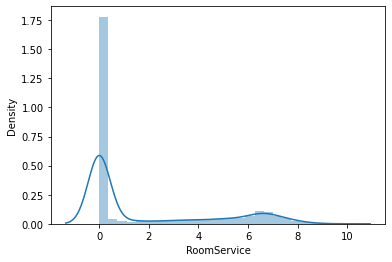

In [11]:
sns.distplot(np.log(train['RoomService']+1));

# missing value

In [12]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [14]:
# Age

train_test = [train, test]

for data_age in train_test:
    
    mean = data_age['Age'].mean()
    std = data_age['Age'].std()
    is_null = data_age['Age'].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age = data_age['Age'].copy()
    age[np.isnan(age)] = rand_age
    data_age['Age'] = age
    data_age['Age'] = data_age['Age'].astype(int)

In [15]:
# Categorical 

for data_obj in train_test:
    
    data_obj['HomePlanet'] = data_obj['HomePlanet'].fillna(data_obj['HomePlanet'].mode()[0])
    data_obj['CryoSleep'] = data_obj['CryoSleep'].fillna(data_obj['CryoSleep'].mode()[0])
    data_obj['Cabin'] = data_obj['Cabin'].fillna(data_obj['Cabin'].mode()[0])
    data_obj['Destination'] = data_obj['Destination'].fillna(data_obj['Destination'].mode()[0])
    data_obj['VIP'] = data_obj['VIP'].fillna(data_obj['VIP'].mode()[0])

In [16]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [17]:
# Numerical 

for data_num in train_test:
    
    data_num['RoomService'] = np.log(data_num['Spa']+1) 
    data_num['ShoppingMall'] = np.log(data_num['ShoppingMall']+1) 
    data_num['Spa'] = np.log(data_num['Spa']+1) 
    data_num['VRDeck'] = np.log(data_num['VRDeck']+1) 
    data_num['FoodCourt'] = np.log(data_num['FoodCourt']+1) 

    data_num['RoomService'] = data_num['RoomService'].fillna(data_num['RoomService'].median())
    data_num['ShoppingMall'] = data_num['ShoppingMall'].fillna(data_num['ShoppingMall'].median())
    data_num['Spa'] = data_num['Spa'].fillna(data_num['Spa'].median())
    data_num['VRDeck'] = data_num['VRDeck'].fillna(data_num['VRDeck'].median())
    data_num['FoodCourt'] = data_num['FoodCourt'].fillna(data_num['FoodCourt'].median())

In [18]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [19]:
# Drop Name

for data_name in train_test:
    data_name.drop('Name', axis=1, inplace=True)

In [20]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [21]:
# Label Encoding 

for data in train_test:
    
    data['HomePlanet'] =data['HomePlanet'].astype('category').cat.codes
    data['Destination'] =data['Destination'].astype('category').cat.codes

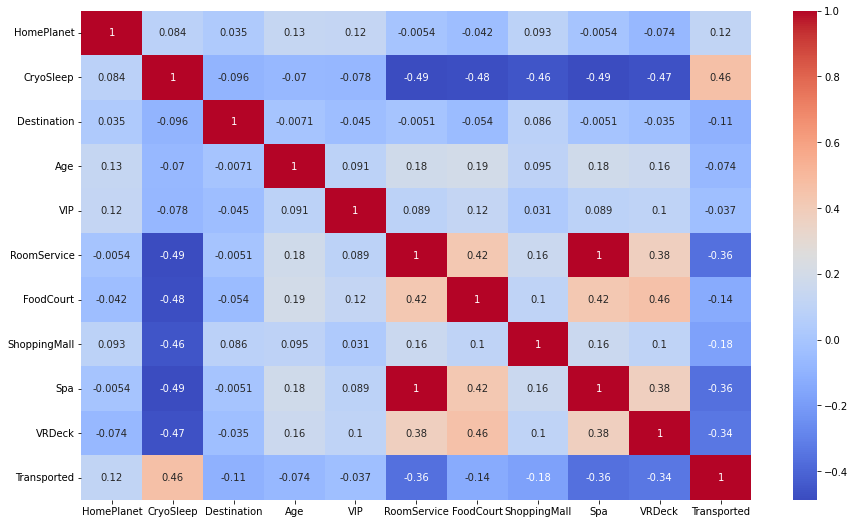

In [22]:
# Corr Matrix

corr = train.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot= True, cmap= 'coolwarm');

In [23]:
# Data cleaning for model

train = train.drop('Cabin', axis= 1)
test = test.drop('Cabin', axis= 1)

# model

In [24]:
X = train.drop('Transported', axis=1)
y = train['Transported']
X_test = test 

In [25]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,1,False,2,39,False,0.000000,0.000000,0.000000,0.000000,0.000000
1,0002_01,0,False,2,24,False,6.309918,2.302585,3.258097,6.309918,3.806662
2,0003_01,1,False,2,58,True,8.812248,8.182280,0.000000,8.812248,3.912023
3,0003_02,1,False,2,33,False,8.110728,7.157735,5.918894,8.110728,5.267858
4,0004_01,0,False,2,16,False,6.338594,4.262680,5.023881,6.338594,1.098612


In [26]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [27]:
X_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,True,2,27,False,0.000000,0.000000,0.000000,0.000000,0.00000
1,0018_01,0,False,2,19,False,7.945910,2.302585,0.000000,7.945910,0.00000
2,0019_01,1,True,0,31,False,0.000000,0.000000,0.000000,0.000000,0.00000
3,0021_01,1,False,2,38,False,5.204007,8.802823,0.000000,5.204007,6.37332
4,0023_01,0,False,2,20,False,0.000000,0.000000,6.455199,0.000000,0.00000


In [28]:
# Feature Scaling 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

In [30]:
def classify(model, xx, yy):
    
    x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state= 42)
    model.fit(x_train, y_train)
    print('Accuracy: ', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score: ', np.mean(score))

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classify(model, X, y)

Accuracy:  0.7297297297297297
CV Score:  0.733235309103879


In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy:  0.7101782633697528
CV Score:  0.6278743057628056


In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model, X, y)

Accuracy:  0.765382403680276
CV Score:  0.690103170280924


In [34]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy:  0.7527314548591144
CV Score:  0.7425568971758036


In [35]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
classify(model, X, y)

Accuracy:  0.777458309373203
CV Score:  0.6118748722034475


In [36]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
classify(model, X, y)

Accuracy:  0.7487061529614721
CV Score:  0.7470429614787277


# complete model trainning with full fata

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)

In [38]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(X_test)
print(model_rf.score(x_test, y_test))

y_submission = model_rf.predict(X_test) 

0.7686292548298068


In [39]:
params = { 'n_estimators' : [50, 100, 200, 1000],
           'max_depth' : [4, 6, 8, 12],
           'min_samples_leaf' : [4, 8, 12, 16],
           'min_samples_split' : [4, 8, 12, 16]}

from sklearn.model_selection import GridSearchCV

rf_cv = GridSearchCV(model_rf, params, cv = 10, n_jobs = -1, verbose = 2)
rf_cv_model = rf_cv.fit(x_train, y_train)
rf_cv_model

Fitting 10 folds for each of 256 candidates, totalling 2560 fits
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   6.6s
[CV] END max_depth=4, min_samples_lea

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 12],
                         'min_samples_leaf': [4, 8, 12, 16],
                         'min_samples_split': [4, 8, 12, 16],
                         'n_estimators': [50, 100, 200, 1000]},
             verbose=2)

In [40]:
rf_cv_model.best_params_

{'max_depth': 12,
 'min_samples_leaf': 12,
 'min_samples_split': 4,
 'n_estimators': 1000}

In [41]:
model_rf = RandomForestClassifier(max_depth=12, min_samples_leaf=12, min_samples_split=8, n_estimators=50)
model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(X_test)
print(model_rf.score(x_test, y_test))

y_submission = model_rf.predict(X_test) 

0.7782888684452622


In [42]:
submission = pd.DataFrame({
        "PassengerId": pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')["PassengerId"],
        "Transported": y_submission
    })
submission.to_csv('./submission.csv', index=False)

In [43]:
# 1st attempt: 0.75333 knn

# 2st attempt: 0.76969 extra_tress 

# 3st attempt: 0.77460 random_forest

# 4st attempt: 0.78489 optimize_params_random_forest